In [78]:
import os, geopandas as gpd

dep=gpd.read_file(os.path.join('mapas','departamentos','DEPARTAMENTOS.shp'))

In [79]:
type(dep)

geopandas.geodataframe.GeoDataFrame

<Axes: >

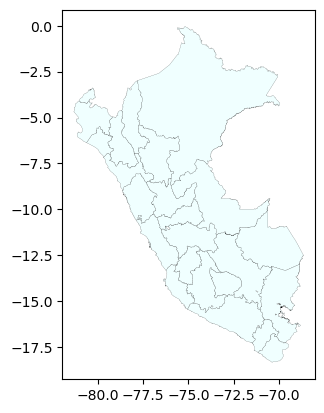

In [80]:
dep.plot(facecolor="azure",#color of polygon fill
               edgecolor='black', #color of lines
               linewidth=0.1) #thickness of lines

In [81]:
prov=gpd.read_file(os.path.join('mapas','provincias','PROVINCIAS.shp'))

<Axes: >

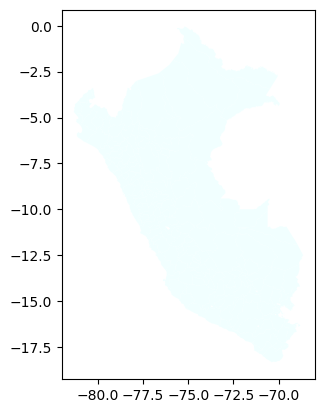

In [15]:
## Sale muy claro, no se ve nada
# provincias.plot(marker='.', # marker type
#            color='azure',
#            markersize=1,
#            alpha=0.9) # transparency

<Axes: >

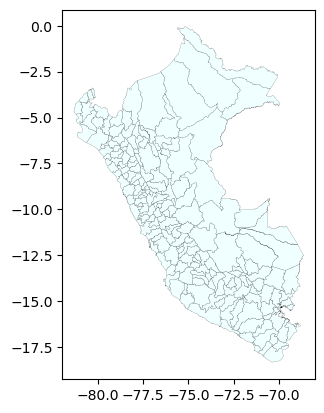

In [82]:
prov.plot(facecolor="azure", #color of polygon fill
              edgecolor='black', #color of lines
              linewidth=0.1) # thickness of lines

In [13]:
dep.crs==prov.crs

True

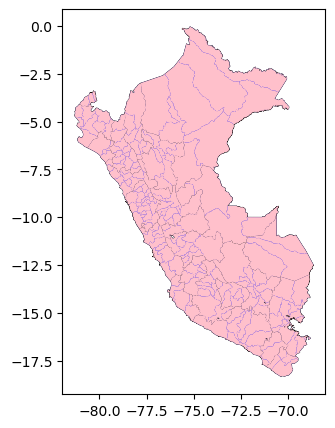

In [83]:
import matplotlib.pyplot as plt

base = peru.plot(facecolor="blue", edgecolor='black', linewidth=0.4,figsize=(5,5))
prov.plot(marker='+', color='pink', markersize=15,ax=base)
plt.savefig(os.path.join('imagenes','peru2.jpg'))

In [84]:
dep.to_file(os.path.join("mapas","peruMaps.gpkg"), layer='dep', driver="GPKG")
prov.to_file(os.path.join("mapas","peruMaps.gpkg"), layer='prov', driver="GPKG")

In [ ]:
##Separación

In [68]:
peruMapa="https://github.com/Proyecto-Magallanes/Dashboard/raw/main/mapas/peruMaps.gpkg"

In [69]:
from  fiona import listlayers

listlayers(peruMapa)

['peru', 'prov']

In [70]:
dep=gpd.read_file(peruMapa,layer='peru')
prov=gpd.read_file(peruMapa,layer='prov')

In [71]:
#Segundo parte del ejercicio
dep.crs.axis_info


[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [72]:
dep.to_crs(3587).crs.axis_info

[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_20088\4207713755.py:2: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  prov.to_crs(3587).centroid.plot(color='red',ax=base3587)


<Axes: >

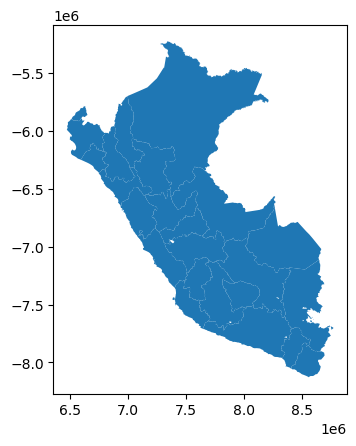

In [73]:
base3587= dep.to_crs(3587).plot()
prov.to_crs(3587).centroid.plot(color='red',ax=base3587)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_20088\2354942940.py:2: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  prov.to_crs(24891).centroid.plot(color='red',ax=base24891)


<Axes: >

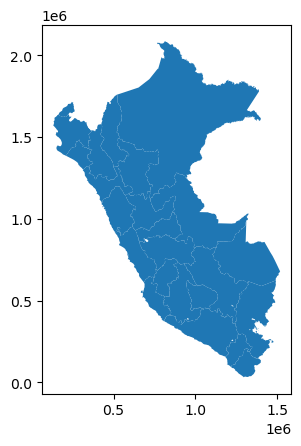

In [74]:
base24891=dep.to_crs(24891).plot()
prov.to_crs(24891).centroid.plot(color='red',ax=base24891)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_20088\3455509642.py:7: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  prov.to_crs(24891).centroid.plot(color='red',ax=ax1)


<Axes: title={'center': 'projected (24891)'}>

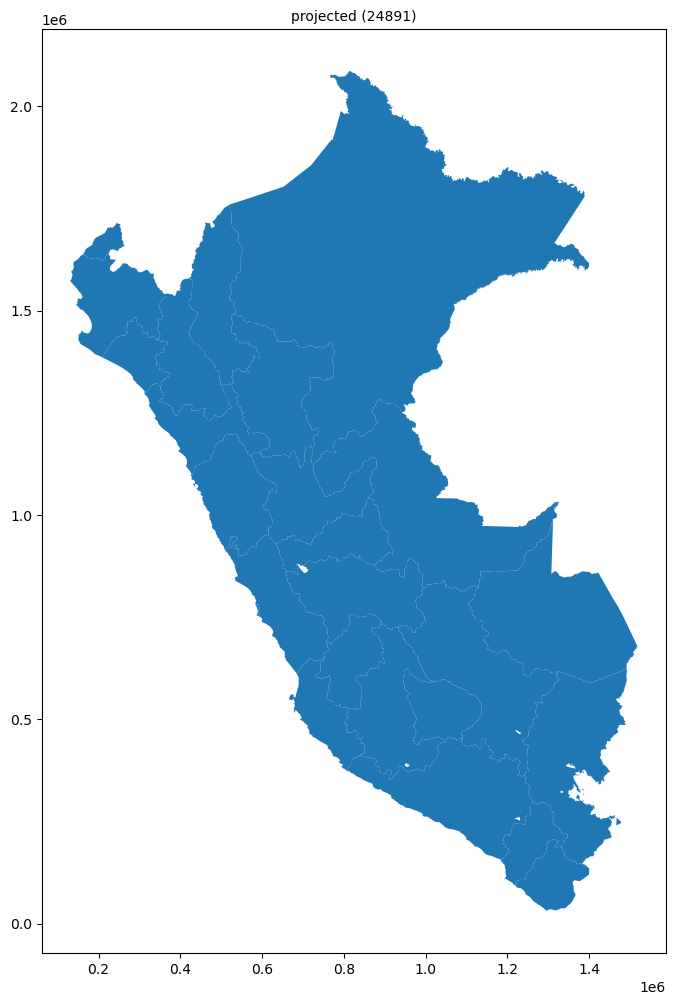

In [75]:
from matplotlib import pyplot

fig, (ax1) = pyplot.subplots(ncols=1, sharex=False, sharey=False, figsize=(12,12))

ax1.set_title('projected (24891)',fontsize=10)
dep.to_crs(24891).plot(ax=ax1)
prov.to_crs(24891).centroid.plot(color='red',ax=ax1)


In [76]:
dep_24891=dep.to_crs(24891)
prov_24891=prov.to_crs(24891)

In [77]:
dep_24891.to_file(os.path.join("mapas","PeruMaps_24891.gpkg"), layer='peru', driver="GPKG")
prov_24891.to_file(os.path.join("mapas","PeruMaps_24891.gpkg"), layer='prov', driver="GPKG")

C:\Users\USUARIO\anaconda3\envs\ProyectoMagallanes\Lib\site-packages\geopandas\io\file.py:608: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
